**Mengimport module**

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import io
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

**Mengupload file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


**Menunjukan data awal di dataset**

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Menunjukan data akhir dari dataset**

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Mengecek missing value**

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Melakukan label encoder variabel kategorik**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# sex
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoke
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

**Menunjukan data awal dari dataset**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


**Menghapus variabel yang tidak dipakai**

In [ ]:
df.drop(['region','sex','children'], axis = 1, inplace = True)

**Menunjukan data awal dari dataset**

In [ ]:
df.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


**Menunjukan nama variabel yang dipakai dari dataset**

In [ ]:
df.columns

Index(['age', 'bmi', 'smoker', 'charges'], dtype='object')

**Membuat X menjadi variabel prediktor dan y menjadi variabel target**

In [ ]:
X = df.drop(['charges'], axis = 1)
y = df.charges

In [ ]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
y_reshape = y.reshape(-1,1)

**Standarisasi dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_scale = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y_scale = scaler_y.fit_transform(y_reshape)

**Membagi dataset menjadi data train dan test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y_scale,test_size = 0.2,random_state = 42)

**Menunjukan ukuran data train dan test**

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 3)
(268, 3)
(1070, 1)
(268, 1)


**Mengimport module tensorflow**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

**Membuat model regresi dengan Deep Learning**

In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 3))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(180))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))

ANN_model.add(Dense(180))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))

ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                200       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 180)               9180      
                                                                 
 activation_1 (Activation)   (None, 180)               0         
                                                                 
 dropout (Dropout)           (None, 180)               0         
                                                                 
 dense_2 (Dense)             (None, 180)               32580     
                                                                 
 activation_2 (Activation)   (None, 180)               0

**Mencari parameter terbik dengan manual grid search**

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    from sklearn.metrics import mean_absolute_percentage_error
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            ANN_model = keras.Sequential()
            # Defining the first layer of the model
            ANN_model.add(Dense(50, input_dim = 3))
            ANN_model.add(Activation('relu'))
 
            # Defining the Second layer of the model
            ANN_model.add(Dense(180))
            ANN_model.add(Activation('relu'))
            ANN_model.add(Dropout(0.3))

            ANN_model.add(Dense(180))
            ANN_model.add(Activation('relu'))
            ANN_model.add(Dropout(0.3))

            ANN_model.add(Dense(50))
            ANN_model.add(Activation('linear'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            ANN_model.add(Dense(1))
 
            # Compiling the model
            ANN_model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            ANN_model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = mean_absolute_percentage_error(y_test, ANN_model.predict(X_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)


1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 99.41582953929901
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 99.15756034851074
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 99.36772131919861
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 99.33089864253998
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 99.2462671995163
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 99.4059339761734
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 99.38256740570068
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 99.38059836626053
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 99.28731989860535
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 99.55462539196014
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 99.37628537416458
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 99.31039363145828
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 99.43468624353409
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 99.24608790874481
15 Parameters: batch_s

**Meng-compile model**

In [ ]:
# Compile the model and trainning
ANN_model.compile(optimizer= 'Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs= 10, batch_size = 15, validation_split= 0.2)

result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print('Accuracy : {}'.format(accuracy_ANN))

Epoch 1/10
58/58 [==============================] - 2s 11ms/step - loss: 0.3243 - val_loss: 0.1472
Epoch 2/10
58/58 [==============================] - 0s 6ms/step - loss: 0.2140 - val_loss: 0.1836
Epoch 3/10
58/58 [==============================] - 0s 6ms/step - loss: 0.2055 - val_loss: 0.1775
Epoch 4/10
58/58 [==============================] - 1s 9ms/step - loss: 0.2038 - val_loss: 0.1513
Epoch 5/10
58/58 [==============================] - 1s 10ms/step - loss: 0.1949 - val_loss: 0.1468
Epoch 6/10
58/58 [==============================] - 1s 9ms/step - loss: 0.1891 - val_loss: 0.1716
Epoch 7/10
58/58 [==============================] - 0s 7ms/step - loss: 0.2054 - val_loss: 0.1639
Epoch 8/10
58/58 [==============================] - 0s 7ms/step - loss: 0.1838 - val_loss: 0.1515
Epoch 9/10
58/58 [==============================] - 0s 7ms/step - loss: 0.1914 - val_loss: 0.1458
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.1396
Accuracy : 0.8603975623846054


**Membuat grafik model loss**

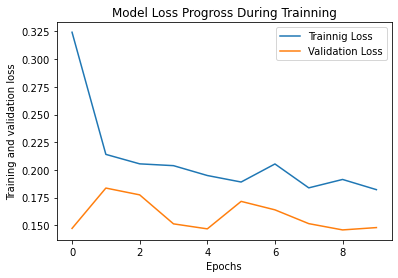

In [ ]:
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progross During Trainning')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Trainnig Loss','Validation Loss'])

**Melakukan prediksi**

In [ ]:
y_pred = ANN_model.predict(X_test)

y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)
X_test_orig = scaler_x.inverse_transform(X_test)

TestingData=pd.DataFrame(X_test_orig)

Data_age = TestingData.drop([1,2], axis = 1)
Data_age.columns = ["Age"]

Data_bmi = TestingData.drop([0,2], axis = 1)
Data_bmi.columns = ["Bmi"]

Data_smoker = TestingData.drop([0,1], axis = 1)
Data_smoker.columns = ["Smoker"]
le.fit(Data_smoker.Smoker)
Data_smoker.Smoker = le.transform(Data_smoker.Smoker)

data_pred=pd.DataFrame(y_test_orig)
data_pred.columns = ["Predictions"]

data_charge=pd.DataFrame(y_pred_orig)
data_charge.columns = ["Charge"]

ins = pd.concat([Data_age,Data_bmi,Data_smoker,data_pred,data_charge], axis=1, join='inner')

display(ins)

,Age,Bmi,Smoker,Predictions,Charge
0,45.0,25.174999,0,9095.068359,9322.292969
1,36.0,30.020000,0,5272.175781,6790.175781
2,64.0,26.885000,1,29330.982422,29322.216797
3,46.0,25.745001,0,9301.893555,9770.514648
4,19.0,31.920000,1,33750.292969,31045.375000
...,...,...,...,...,...
263,63.0,35.090000,1,47055.531250,50572.726562
264,58.0,27.170000,0,12222.898438,13122.441406
265,38.0,28.025000,0,6067.126465,7357.118652
266,54.0,47.410000,1,63770.429688,44972.648438


**Evaluasi model**

In [ ]:
from sklearn import metrics
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.r2_score(y_test, y_pred))

MAE 0.2155455
MSE 0.13960244
RMSE 0.3736341
R2 0.8682261232255116
